<a href="https://colab.research.google.com/github/tamim36/Machine-Learning/blob/master/Heart-Disease-logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('heart.csv')

In [13]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


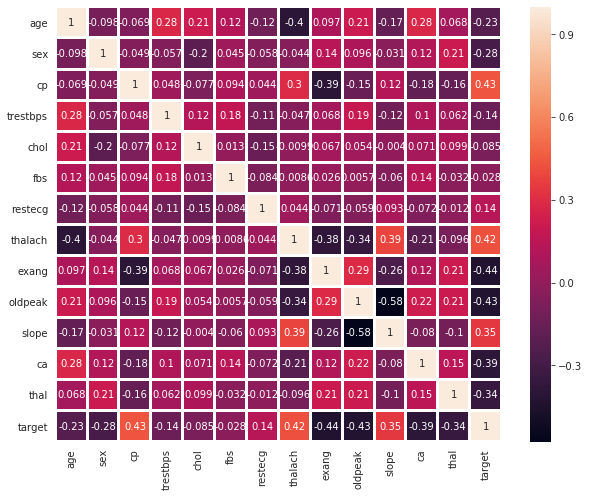

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,)

Text(0.5, 0, '-ve Heart Diagnosis                   +ve Heart Diagnosis')

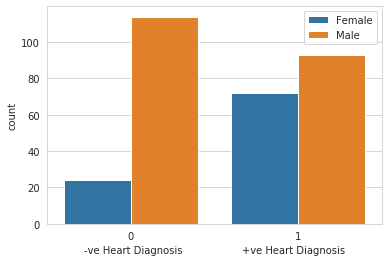

In [16]:
sns.countplot(x='target',data=df,hue='sex')
plt.legend(['Female','Male'])
plt.xlabel('-ve Heart Diagnosis                   +ve Heart Diagnosis')

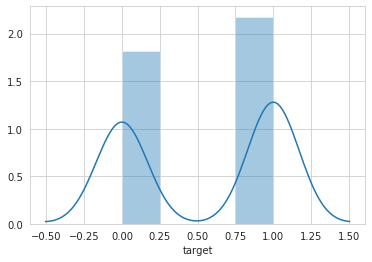

In [39]:
sns.distplot(df['target'])

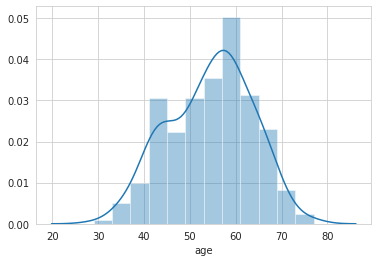

In [19]:
sns.distplot(df['age'],)

In [20]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [0]:
df['Age_Category']= pd.cut(df['age'],bins=list(np.arange(25, 85, 5)))

Text(0.5, 1.0, 'Age Distribution of Patients with -ve Heart Diagonsis')

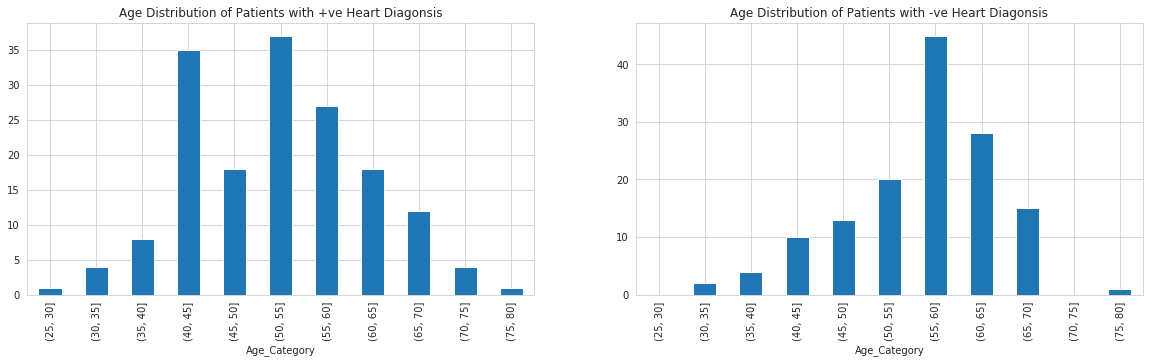

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(121)
df[df['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with +ve Heart Diagonsis')

plt.subplot(122)
df[df['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with -ve Heart Diagonsis')

In [23]:
df.nunique()

age              41
sex               2
cp                4
trestbps         49
chol            152
fbs               2
restecg           3
thalach          91
exang             2
oldpeak          40
slope             3
ca                5
thal              4
target            2
Age_Category     11
dtype: int64

Text(0, 0.5, 'Counts of Chest pain Type')

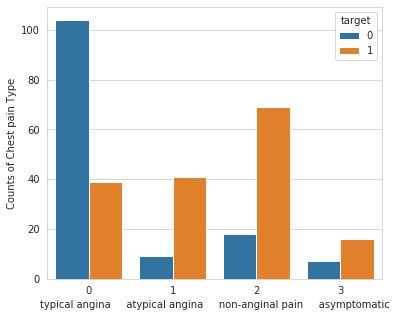

In [24]:
plt.figure(figsize=(6,5))
sns.countplot(x='cp',data=df,hue='target')
plt.xlabel('typical angina     atypical angina     non-anginal pain     asymptomatic')
plt.ylabel('Counts of Chest pain Type')

Text(0, 0.5, 'Count')

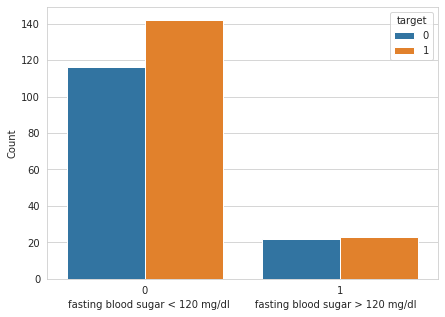

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x='fbs',data=df,hue='target')
plt.xlabel('fasting blood sugar < 120 mg/dl        fasting blood sugar > 120 mg/dl')
plt.ylabel('Count')

In [0]:
df = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','Age_Category'])

In [27]:
df.shape

(303, 42)

In [0]:
df.drop(['age'],axis=1,inplace=True)

In [29]:
df.shape

(303, 41)

### Modeling The Data

In [0]:
y = df['target']
X = df.drop(['target'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.94      0.93      0.93        54

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [37]:
print(accuracy_score(y_test,y_pred))

0.93


In [38]:
print(confusion_matrix(y_test,y_pred))

[[43  3]
 [ 4 50]]


### Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train : ",X_train[:1])
print("X_test : ", X_test[:1])

X_train :  [[-1.77672978 -0.1952946   0.23139125 -0.76853914 -0.64009548  0.64009548
   1.0768354  -0.40824829 -0.67082039 -0.30232077  0.41642575 -0.41642575
  -0.92864704  0.94720445 -0.09975093  0.63245553 -0.63245553 -0.27216553
  -0.91948602  1.05573829 -1.20240722  1.84744242 -0.3305898  -0.26157418
  -0.14177624  0.         -0.27216553 -1.09841783  1.26592421 -0.07035975
  -0.15891043 -0.17451892 -0.42453805 -0.34863586 -0.41642575  1.64039906
  -0.44058784 -0.30232077 -0.09975093 -0.07035975]]
X_test :  [[-0.07032947 -0.15750165  1.04281509 -0.85638455  1.56226693 -1.56226693
  -0.92864704  2.44948974 -0.67082039 -0.30232077  0.41642575 -0.41642575
   1.0768354  -1.05573829 -0.09975093  0.63245553 -0.63245553 -0.27216553
   1.08756411 -0.94720445 -1.20240722  1.84744242 -0.3305898  -0.26157418
  -0.14177624  0.         -0.27216553  0.91040037 -0.78993671 -0.07035975
  -0.15891043 -0.17451892 -0.42453805 -0.34863586 -0.41642575  1.64039906
  -0.44058784 -0.30232077 -0.09975093 -

In [42]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = classifier.predict(X_test)
print("y_pred : ", y_pred)

y_pred :  [1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1]


In [44]:
cm = confusion_matrix(y_test, y_pred)
print("cm : \n", cm)

cm : 
 [[42  4]
 [ 6 48]]


In [46]:
print(accuracy_score(y_test,y_pred))

0.9
